In [41]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'5000',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'dc9de4a8-685c-4870-894b-c9ea302a3ce6',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

HTTPSConnectionPool(host='https', port=443): Max retries exceeded with url: //pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest?start=1&limit=5000&convert=USD (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x1395052d0>: Failed to resolve 'https' ([Errno 8] nodename nor servname provided, or not known)"))


In [43]:
type(data)

dict

In [45]:
import pandas as pd


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [47]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11621,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.973448e+07,1.973448e+07,False,NaN,1,NaN,NaN,None,2024-08-02T05:37:00.000Z,64314.993042,3.817971e+10,5.9066,-0.192058,0.306131,-4.024872,5.679093,-6.337457,1.771300,1.269223e+12,55.2731,1.350615e+12,None,2024-08-02T05:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-02 11:16:02.244533
1,1027,Ethereum,ETH,ethereum,9183,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202532e+08,1.202532e+08,True,NaN,2,NaN,NaN,None,2024-08-02T05:36:00.000Z,3159.161241,1.799471e+10,-4.1427,-0.258044,-0.385740,-3.095438,-5.891724,-17.274030,1.470806,3.798991e+11,16.5319,3.798991e+11,None,2024-08-02T05:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-02 11:16:02.244533
2,825,Tether USDt,USDT,tether,93320,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.145013e+11,1.170681e+11,True,NaN,3,NaN,NaN,None,2024-08-02T05:36:00.000Z,0.999137,6.148624e+10,5.6345,-0.002198,-0.032609,-0.068761,0.068919,-0.025265,-0.118745,1.144025e+11,4.9784,1.169670e+11,None,2024-08-02T05:36:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-02 11:16:02.244533
3,1839,BNB,BNB,bnb,2203,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459373e+08,1.459373e+08,False,NaN,4,NaN,NaN,None,2024-08-02T05:36:00.000Z,570.577692,1.981484e+09,8.7489,-0.091230,0.238899,-1.529663,0.890425,-6.751761,-2.493235,8.326857e+10,3.6236,8.326857e+10,None,2024-08-02T05:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-02 11:16:02.244533
4,5426,Solana,SOL,solana,712,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.652616e+08,5.813423e+08,True,NaN,5,NaN,NaN,None,2024-08-02T05:36:00.000Z,163.713310,3.999323e+09,11.3793,-0.185357,-3.251968,-7.802075,10.283633,-0.579633,12.613656,7.616952e+10,3.3196,9.517348e+10,None,2024-08-02T05:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-02 11:16:02.244533
5,3408,USDC,USDC,usd-coin,21243,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.293836e+10,3.293836e+10,False,NaN,6,NaN,NaN,None,2024-08-02T05:36:00.000Z,0.999937,6.935475e+09,5.0917,0.002658,-0.005227,-0.006013,0.001761,-0.006652,-0.003910,3.293627e+10,1.4333,3.293627e+10,None,2024-08-02T05:36:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-02 11:16:02.244533
6,52,XRP,XRP,xrp,1358,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.599928e+10,9.998739e+10,False,NaN,7,NaN,NaN,None,2024-08-02T05:37:00.000Z,0.577707,1.751565e+09,-17.1523,-0.575048,-4.805182,-4.687805,20.522129,11.549616,9.214385,3.235120e+10,1.4100,5.777074e+10,None,2024-08-02T05:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-02 11:16:02.244533
7,74,Dogecoin,DOGE,dogecoin,1032,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.453639e+11,1.453639e+11,True,NaN,8,NaN,NaN,None,2024-08-02T05:37:00.000Z,0.116903,8.034302e+08,18.0017,-0.406408,-2.865497,-9.660419,-3.912034,-27.259585,-22.016155,1.699346e+10,0.7407,1.699346e+10,None,2024-08-02T05:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-02 11:16:02.244533
8,11419,Toncoin,TON,toncoin,481,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.517008

In [58]:
import os
from time import sleep
import pandas as pd
import json
import requests
from requests import Session, ConnectionError, Timeout, TooManyRedirects

# Initialize an empty DataFrame
df = pd.DataFrame()

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    parameters = {
      'start': '1',
      'limit': '15',
      'convert': 'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
      return

    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    
    # Concatenate the new data with the existing DataFrame
    df = pd.concat([df, df2], ignore_index=True)

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60)

   

API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [60]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,11621,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.973448e+07,1.973448e+07,False,NaN,1,NaN,NaN,None,2024-08-02T06:00:00.000Z,64108.591988,3.822438e+10,5.9269,-0.555816,-0.247571,-4.201302,5.058955,-6.631607,1.110279,1.265150e+12,55.3363,1.346280e+12,None,2024-08-02T06:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-02 11:30:54.688929
1,1027,Ethereum,ETH,ethereum,9183,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202532e+08,1.202532e+08,True,NaN,2,NaN,NaN,None,2024-08-02T05:59:00.000Z,3146.214933,1.794095e+10,-4.8924,-0.547755,-1.171332,-3.740719,-6.440849,-17.450774,0.873768,3.783423e+11,16.5473,3.783423e+11,None,2024-08-02T05:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-02 11:30:54.688929
2,825,Tether USDt,USDT,tether,93321,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.145013e+11,1.170681e+11,True,NaN,3,NaN,NaN,None,2024-08-02T05:59:00.000Z,0.999231,6.153458e+10,5.6702,0.024427,-0.029532,-0.054041,0.063898,-0.019033,-0.106570,1.144132e+11,5.0040,1.169781e+11,None,2024-08-02T05:59:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-02 11:30:54.688929
3,1839,BNB,BNB,bnb,2203,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459373e+08,1.459373e+08,False,NaN,4,NaN,NaN,None,2024-08-02T05:59:00.000Z,568.365753,1.982902e+09,8.7425,-0.703791,-0.316484,-1.932175,0.344842,-7.172731,-3.164814,8.294576e+10,3.6277,8.294576e+10,None,2024-08-02T05:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-02 11:30:54.688929
4,5426,Solana,SOL,solana,712,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.652616e+08,5.813423e+08,True,NaN,5,NaN,NaN,None,2024-08-02T05:59:00.000Z,162.413516,3.977037e+09,9.8921,-1.322458,-3.945616,-8.287289,8.981253,-1.255062,11.941362,7.556478e+10,3.3036,9.441785e+10,None,2024-08-02T05:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-02 11:30:54.688929
5,3408,USDC,USDC,usd-coin,21243,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.293836e+10,3.293836e+10,False,NaN,6,NaN,NaN,None,2024-08-02T05:59:00.000Z,1.000053,6.952650e+09,5.6095,0.017287,0.002807,0.011054,0.004012,-0.003545,0.004720,3.294011e+10,1.4407,3.294011e+10,None,2024-08-02T05:59:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-02 11:30:54.688929
6,52,XRP,XRP,xrp,1358,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.599928e+10,9.998739e+10,False,NaN,7,NaN,NaN,None,2024-08-02T06:00:00.000Z,0.573630,1.752339e+09,-17.2522,-1.347410,-5.661170,-5.406523,19.592292,10.894314,8.237003,3.212286e+10,1.4049,5.736299e+10,None,2024-08-02T06:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-02 11:30:54.688929
7,74,Dogecoin,DOGE,dogecoin,1032,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.453639e+11,1.453639e+11,True,NaN,8,NaN,NaN,None,2024-08-02T06:00:00.000Z,0.116130,8.063368e+08,18.3438,-1.055191,-3.845786,-9.977859,-4.805799,-27.530502,-23.518480,1.688111e+10,0.7383,1.688111e+10,None,2024-08-02T06:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-02 11:30:54.688929
8,11419,Toncoin,TON,toncoin,481,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.517008e+09

In [62]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [64]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,11621,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19734481.00000,19734481.00000,False,NaN,1,NaN,NaN,None,2024-08-02T06:00:00.000Z,64108.59199,38224384281.21330,5.92690,-0.55582,-0.24757,-4.20130,5.05895,-6.63161,1.11028,1265149790533.33496,55.33630,1346280431758.00000,None,2024-08-02T06:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-02 11:30:54.688929
1,1027,Ethereum,ETH,ethereum,9183,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120253156.18023,120253156.18023,True,NaN,2,NaN,NaN,None,2024-08-02T05:59:00.000Z,3146.21493,17940949191.41295,-4.89240,-0.54776,-1.17133,-3.74072,-6.44085,-17.45077,0.87377,378342275762.15796,16.54730,378342275762.15997,None,2024-08-02T05:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-02 11:30:54.688929
2,825,Tether USDt,USDT,tether,93321,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,114501280130.73694,117068083204.24847,True,NaN,3,NaN,NaN,None,2024-08-02T05:59:00.000Z,0.99923,61534575128.41969,5.67020,0.02443,-0.02953,-0.05404,0.06390,-0.01903,-0.10657,114413226372.18001,5.00400,116978055523.14999,None,2024-08-02T05:59:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-02 11:30:54.688929
3,1839,BNB,BNB,bnb,2203,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145937302.12126,145937302.12126,False,NaN,4,NaN,NaN,None,2024-08-02T05:59:00.000Z,568.36575,1982902403.78501,8.74250,-0.70379,-0.31648,-1.93218,0.34484,-7.17273,-3.16481,82945764582.99532,3.62770,82945764583.00000,None,2024-08-02T05:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-02 11:30:54.688929
4,5426,Solana,SOL,solana,712,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,465261649.20011,581342340.63926,True,NaN,5,NaN,NaN,None,2024-08-02T05:59:00.000Z,162.41352,3977037416.78814,9.89210,-1.32246,-3.94562,-8.28729,8.98125,-1.25506,11.94136,75564780325.45290,3.30360,94417853566.50999,None,2024-08-02T05:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-02 11:30:54.688929
5,3408,USDC,USDC,usd-coin,21243,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,32938356705.42496,32938356705.42496,False,NaN,6,NaN,NaN,None,2024-08-02T05:59:00.000Z,1.00005,6952650319.91072,5.60950,0.01729,0.00281,0.01105,0.00401,-0.00355,0.00472,32940106444.21664,1.44070,32940106444.22000,None,2024-08-02T05:59:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-02 11:30:54.688929
6,52,XRP,XRP,xrp,1358,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55999283950.00000,99987385748.00000,False,NaN,7,NaN,NaN,None,2024-08-02T06:00:00.000Z,0.57363,1752339498.45738,-17.25220,-1.34741,-5.66117,-5.40652,19.59229,10.89431,8.23700,32122862990.82022,1.40490,57362988818.75000,None,2024-08-02T06:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-02 11:30:54.688929
7,74,Dogecoin,DOGE,dogecoin,1032,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,145363916383.70526,145363916383.70526,True,NaN,8,NaN,NaN,None,2024-08-02T06:00:00.000Z,0.11613,806336798.20352,18.34380,-1.05519,-3.84579,-9.97786,-4.80580,-27.53050,-23.51848,16881105303.28240,0.73830,16881105303.28000,None,2024-08-02T06:00:00.000Z,NaN,NaN,

In [66]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.44420,-0.15136,-4.14565,5.12016,-6.60611,1.22116
Ethereum,-0.53889,-1.11242,-3.69220,-6.44202,-17.47253,0.89087
Tether USDt,0.03725,-0.01188,-0.03961,0.09145,0.00357,-0.09565
BNB,-0.78071,-0.40829,-2.01789,0.26404,-7.27654,-3.24814
Solana,-1.49221,-3.91523,-8.30121,8.89118,-1.32711,11.87262
USDC,0.00492,-0.00173,0.00045,0.00221,-0.00434,-0.00093
XRP,-1.38436,-5.58172,-5.42559,19.55579,10.86024,8.19855
Dogecoin,-1.13704,-3.85790,-9.98405,-4.87594,-27.57379,-23.45984
Toncoin,-0.61535,-1.66131,-1.99014,-17.46530,-2.08366,13.64830


In [68]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.44420
              quote.USD.percent_change_24h    -0.15136
              quote.USD.percent_change_7d     -4.14565
              quote.USD.percent_change_30d     5.12016
              quote.USD.percent_change_60d    -6.60611
              quote.USD.percent_change_90d     1.22116
Ethereum      quote.USD.percent_change_1h     -0.53889
              quote.USD.percent_change_24h    -1.11242
              quote.USD.percent_change_7d     -3.69220
              quote.USD.percent_change_30d    -6.44202
              quote.USD.percent_change_60d   -17.47253
              quote.USD.percent_change_90d     0.89087
Tether USDt   quote.USD.percent_change_1h      0.03725
              quote.USD.percent_change_24h    -0.01188
              quote.USD.percent_change_7d     -0.03961
              quote.USD.percent_change_30d     0.09145
              quote.USD.percent_change_60d     0.00357
              quote.US

In [70]:
type(df4)

pandas.core.series.Series

In [104]:
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h   -0.44420
             quote.USD.percent_change_24h  -0.15136
             quote.USD.percent_change_7d   -4.14565
             quote.USD.percent_change_30d   5.12016
             quote.USD.percent_change_60d  -6.60611
             quote.USD.percent_change_90d   1.22116
Ethereum     quote.USD.percent_change_1h   -0.53889
             quote.USD.percent_change_24h  -1.11242
             quote.USD.percent_change_7d   -3.69220
             quote.USD.percent_change_30d  -6.44202
             quote.USD.percent_change_60d -17.47253
             quote.USD.percent_change_90d   0.89087
Tether USDt  quote.USD.percent_change_1h    0.03725
             quote.USD.percent_change_24h  -0.01188
             quote.USD.percent_change_7d   -0.03961
             quote.USD.percent_change_30d   0.09145
             quote.USD.percent_change_60d   0.00357
             quote.USD.percent_change_90d  -0.09565
BNB          quote.USD.percent_change_1h   -0.78071
             quote.USD.percent_change_24h  -0.40829
             quote.USD.percent_change_7d   -2.01789
             quote.USD.percent_change_30d   0.26404
             quote.USD.percent_change_60d  -7.27654
             quote.USD.percent_change_90d  -3.24814
Solana       quote.USD.percent_change_1h   -1.49221
             quote.USD.percent_change_24h  -3.91523
             quote.USD.percent_change_7d   -8.30121
             quote.USD.percent_change_30d   8.89118
             quote.USD.percent_change_60d  -1.32711
             quote.USD.percent_change_90d  11.87262
USDC         quote.USD.percent_change_1h    0.00492
             quote.USD.percent_change_24h  -0.00173
             quote.USD.percent_change_7d    0.00045
             quote.USD.percent_change_30d   0.00221
             quote.USD.percent_change_60d  -0.00434
             quote.USD.percent_change_90d  -0.00093
XRP          quote.USD.percent_change_1h   -1.38436
             quote.USD.percent_change_24h  -5.58172
             quote.USD.percent_change_7d   -5.42559
             quote.USD.percent_change_30d  19.55579
             quote.USD.percent_change_60d  10.86024
             quote.USD.percent_change_90d   8.19855
Dogecoin     quote.USD.percent_change_1h   -1.13704
             quote.USD.percent_change_24h  -3.85790
             quote.USD.percent_change_7d   -9.98405
             quote.USD.percent_change_30d  -4.87594
             quote.USD.percent_change_60d -27.57379
             quote.USD.percent_change_90d -23.45984
Toncoin      quote.USD.percent_change_1h   -0.61535
             quote.USD.percent_change_24h  -1.66131
             quote.USD.percent_change_7d   -1.99014
             quote.USD.percent_change_30d -17.46530
             quote.USD.percent_change_60d  -2.08366
             quote.USD.percent_change_90d  13.64830
Cardano      quote.USD.percent_change_1h   -1.13283
             quote.USD.percent_change_24h  -1.38001
             quote.USD.percent_change_7d   -6.95160
             quote.USD.percent_change_30d  -8.18678
             quote.USD.percent_change_60d -15.61421
             quote.USD.percent_change_90d -18.71831
TRON         quote.USD.percent_change_1h    0.07045
             quote.USD.percent_change_24h  -0.86988
             quote.USD.percent_change_7d   -6.41726
             quote.USD.percent_change_30d  -0.80884
             quote.USD.percent_change_60d  13.12637
             quote.USD.percent_change_90d   4.10926
Avalanche    quote.USD.percent_change_1h   -1.19440
             quote.USD.percent_change_24h  -1.70469
             quote.USD.percent_change_7d  -11.07015
             quote.USD.percent_change_30d -10.92482
             quote.USD.percent_change_60d -29.49830
             quote.USD.percent_change_90d -30.05280
Shiba Inu    quote.USD.percent_change_1h   -0.72094
             quote.USD.percent_change_24h  -2.78649
             quote.USD.percent_change_7d   -8.03368
             quote.USD.percent_change_30d

In [106]:
df5.count()

values    90
dtype: int64

In [108]:
index = pd.Index(range(90))

# Setting the above DataFrame index object as the index
# using set_index() function
df6 = df5.set_index(index)
df6

,values
0,-0.44420
1,-0.15136
2,-4.14565
3,5.12016
4,-6.60611
5,1.22116
6,-0.53889
7,-1.11242
8,-3.69220
9,-6.44202


In [112]:
df7 = df5.rename(columns={'level_1': 'percent_change'})
df7

values
name                                               
Bitcoin      quote.USD.percent_change_1h   -0.44420
             quote.USD.percent_change_24h  -0.15136
             quote.USD.percent_change_7d   -4.14565
             quote.USD.percent_change_30d   5.12016
             quote.USD.percent_change_60d  -6.60611
             quote.USD.percent_change_90d   1.22116
Ethereum     quote.USD.percent_change_1h   -0.53889
             quote.USD.percent_change_24h  -1.11242
             quote.USD.percent_change_7d   -3.69220
             quote.USD.percent_change_30d  -6.44202
             quote.USD.percent_change_60d -17.47253
             quote.USD.percent_change_90d   0.89087
Tether USDt  quote.USD.percent_change_1h    0.03725
             quote.USD.percent_change_24h  -0.01188
             quote.USD.percent_change_7d   -0.03961
             quote.USD.percent_change_30d   0.09145
             quote.USD.percent_change_60d   0.00357
             quote.USD.percent_change_90d  -0.09565
BNB          quote.USD.percent_change_1h   -0.78071
             quote.USD.percent_change_24h  -0.40829
             quote.USD.percent_change_7d   -2.01789
             quote.USD.percent_change_30d   0.26404
             quote.USD.percent_change_60d  -7.27654
             quote.USD.percent_change_90d  -3.24814
Solana       quote.USD.percent_change_1h   -1.49221
             quote.USD.percent_change_24h  -3.91523
             quote.USD.percent_change_7d   -8.30121
             quote.USD.percent_change_30d   8.89118
             quote.USD.percent_change_60d  -1.32711
             quote.USD.percent_change_90d  11.87262
USDC         quote.USD.percent_change_1h    0.00492
             quote.USD.percent_change_24h  -0.00173
             quote.USD.percent_change_7d    0.00045
             quote.USD.percent_change_30d   0.00221
             quote.USD.percent_change_60d  -0.00434
             quote.USD.percent_change_90d  -0.00093
XRP          quote.USD.percent_change_1h   -1.38436
             quote.USD.percent_change_24h  -5.58172
             quote.USD.percent_change_7d   -5.42559
             quote.USD.percent_change_30d  19.55579
             quote.USD.percent_change_60d  10.86024
             quote.USD.percent_change_90d   8.19855
Dogecoin     quote.USD.percent_change_1h   -1.13704
             quote.USD.percent_change_24h  -3.85790
             quote.USD.percent_change_7d   -9.98405
             quote.USD.percent_change_30d  -4.87594
             quote.USD.percent_change_60d -27.57379
             quote.USD.percent_change_90d -23.45984
Toncoin      quote.USD.percent_change_1h   -0.61535
             quote.USD.percent_change_24h  -1.66131
             quote.USD.percent_change_7d   -1.99014
             quote.USD.percent_change_30d -17.46530
             quote.USD.percent_change_60d  -2.08366
             quote.USD.percent_change_90d  13.64830
Cardano      quote.USD.percent_change_1h   -1.13283
             quote.USD.percent_change_24h  -1.38001
             quote.USD.percent_change_7d   -6.95160
             quote.USD.percent_change_30d  -8.18678
             quote.USD.percent_change_60d -15.61421
             quote.USD.percent_change_90d -18.71831
TRON         quote.USD.percent_change_1h    0.07045
             quote.USD.percent_change_24h  -0.86988
             quote.USD.percent_change_7d   -6.41726
             quote.USD.percent_change_30d  -0.80884
             quote.USD.percent_change_60d  13.12637
             quote.USD.percent_change_90d   4.10926
Avalanche    quote.USD.percent_change_1h   -1.19440
             quote.USD.percent_change_24h  -1.70469
             quote.USD.percent_change_7d  -11.07015
             quote.USD.percent_change_30d -10.92482
             quote.USD.percent_change_60d -29.49830
             quote.USD.percent_change_90d -30.05280
Shiba Inu    quote.USD.percent_change_1h   -0.72094
             quote.USD.percent_change_24h  -2.78649
             quote.USD.percent_change_7d   -8.03368
             quote.USD.percent_change_30d

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

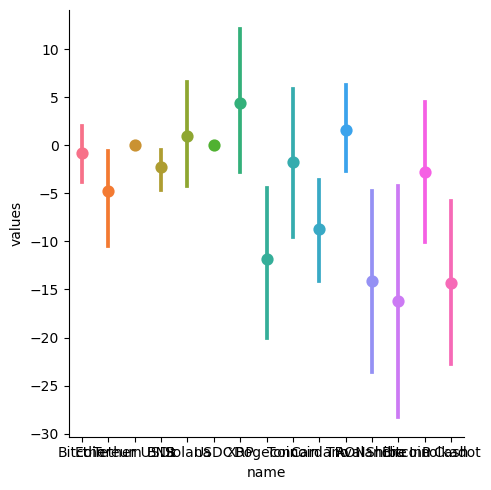

In [138]:
sns.catplot(x='name', y='values', hue='name', data=df7, kind='point')

In [142]:
df10 = df[['name','quote.USD.price']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price
0,Bitcoin,64108.59199
15,Bitcoin,64076.48625
30,Bitcoin,64195.48886
45,Bitcoin,64184.83573


<Axes: xlabel='name', ylabel='quote.USD.price'>

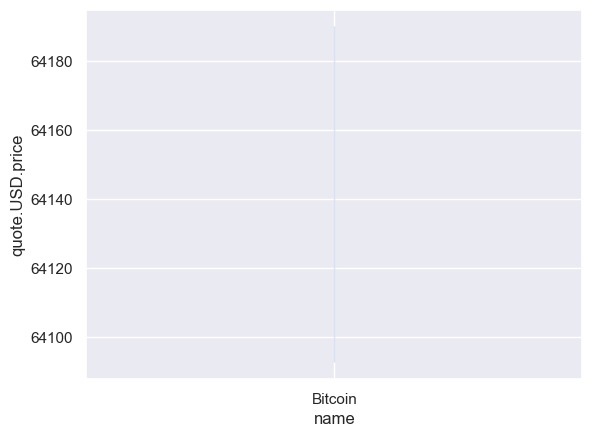

In [146]:
#sns.set_theme(style="darkgrid")

sns.lineplot(x='name', y='quote.USD.price', data = df10)